# Preprocesing Data

In [85]:
import pandas as pd
import re
from math import nan
import numpy as np

In [86]:
housing_data = pd.read_json('data.json')

In [87]:
housing_data.head()

,area,house_price,title,house_location,amenities,property_face,ownership_category,road_access,floors,parking,bedrooms,bathrooms,builtuparea
0,1-3-0-0 Ropani-Aana-Paisa-Daam,"Rs. 75,000","Beautiful house on rent in Bagdol, Nakkhu","Bagdol, Lalitpur Metropolitan City","[Electricity Backup, Drainage, Parking, Drinki...",East,Individual,14Feet /Soil Stabilized,2.5 Stories,NaN,NaN,NaN,NaN
1,0-5-0-0 Ropani-Aana-Paisa-Daam,Price On Call,"Brand new house on sale in Mandikhatar, Kathmandu","Mandikhatar, Budhanilkantha Municipality","[Drainage, Electricity Backup, Drinking Water,...",NaN,Individual,14Feet /Black Topped,NaN,2 car and some bikes,NaN,NaN,NaN
2,0-4-0-0 Ropani-Aana-Paisa-Daam,"Rs. 2,90,00,000","Resudential house on sale in Paiyatar, Kapan","Paiyuntar, Budhanilkantha Municipality","[Drinking Water, Bathroom, Electricity Backup,...",South-East,Individual,10Feet /Gravelled,3 Stories,NaN,NaN,NaN,NaN
3,0-3-0-0 Ropani-Aana-Paisa-Daam,"Rs. 1,75,00,000","Beautiful house on sale in Checkpost, Chandragiri","Chandragiri, Chandragiri Municipality","[Electricity Backup, Drainage, Bathroom, Drink...",NaN,Individual,8-10Feet /Soil Stabilized,2.5 Stories,NaN,NaN,NaN,NaN
4,0-3-0-0 Ropani-Aana-Paisa-Daam,"Rs. 1,70,00,000","Beautiful house on sale in Bhatkekopul, Tokha","Tokha, Tokha Municipality","[Washing Machine, Bathroom, Drinking Water, El...",West,Individual,10Feet /Gravelled,3 Stories,NaN,4,NaN,NaN


### Creating functions to convert raw data to make it more meaningful.

In [88]:
def conversion_to_aana(measurement :str) -> float:
  """This converts land measurement value into just one unit (Anna)."""
  try:
    if measurement.find("Ropani") > -1:
        data = measurement.split('-')
        aana = 16 * float(data[0]) + float(data[1]) + 0.25 * float(data[2]) + 0.0625 * float(data[3][0])
        return aana
    elif measurement.find("Bigha") > -1:
        data = measurement.split('-')
        aana = 213.0021914 * float(data[0]) + 10.65010957 * float(data[1]) + 0.5322505478 * float(data[2]) + 0.006368 * float(data[3][0])
        return aana
    else :
        return nan
        print("ERROR: conversoin_to_aana func")
  except ValueError:
    return nan

In [89]:
def housing_price_filter(price :str) -> float:
    try:
        return float(''.join(price[4:].split(',')))
    except ValueError:
        return nan

In [90]:
def extract_sale_type(x) -> list:
  """Converting string formatting into one type to get rid of the redundancy"""
  try:
      if type(x) != str:
          return nan
      elif x.find("sale") > -1 or x.find("Sale") > -1:
          return "SALE"
      elif x.find("rent") > -1 or x.find("Rent") > -1:
          return "RENT"
      else :
          return nan
  except ValueError:
      return nan

In [91]:
def extract_building_type(x) -> str:
  """Grouping differnt house types."""
  try:
      if type(x) != str:
          return nan
      elif x.find("house") > -1 or x.find("House") > -1 or\
        x.find("home") > -1 or x.find("Home") > -1 or x.find("Mansion") > -1 or\
        x.find("mansion") > -1 or x.find("villa") > -1 or\
          x.find("Villa") > -1 or x.find("Bunglow") > -1 or\
          x.find("bunglow") > -1 or x.find("Bungalow") > -1 or\
            x.find("bungalow") > -1:
          return "HOUSE"
      elif x.find("flat") > -1 or x.find("Flat") > -1 or\
       x.find("apartment") > -1 or x.find("Apartment") > -1:
          return "FLAT"
      elif x.find("ommercial") > -1:
          return "COMM_BUILD"
      else:
          return nan
  except ValueError:
      return nan

In [92]:
def location_one(loc: str):
  if type(loc) != str:
      return nan
  try:
      return loc.split(',')[0]
  except ValueError:
      return nan

In [93]:
def location_two(loc: str):
    if type(loc) != str:
        return nan
    try:
        return loc.split(',')[1]
    except ValueError:
        return nan

In [94]:
def road_size(size: str):
    if type(size) != str:
        return nan
    try:
        data = size.split('/')[0]
        data = data.split('-')[0]
        num = [str(x) for x in data if x.isdigit()]
        num = ''.join(num)
        return float(num)
    except ValueError:
        return nan

In [95]:
def road_type(road: str):
    if type(road) != str:
        return nan
    try:
        return road.split('/')[1]
    except IndexError:
        return nan

In [96]:
def filter_floors(floor: str):
    if type(floor) != str:
        return nan
    try:
        floor = floor.split(' ')[0]
        return float(floor)
    except ValueError:
        return nan

In [97]:
def filter_bed_bath(data):
    if type(data) != str:
        return nan
    try:
        return float(data)
    except ValueError:
        return nan

### Applying functions
Applying the above created functions to the respective columns.

In [98]:
test_housing_data = housing_data.copy()

In [99]:
test_housing_data["bathrooms"] = test_housing_data["bathrooms"].apply(filter_bed_bath)

In [100]:
test_housing_data["bedrooms"] = test_housing_data["bedrooms"].apply(filter_bed_bath)

In [101]:
test_housing_data["area"] = test_housing_data["area"].apply(conversion_to_aana)

In [102]:
test_housing_data["house_price"] = test_housing_data["house_price"].apply(housing_price_filter)

In [103]:
test_housing_data["property_type"] = test_housing_data["title"].apply(extract_building_type)

In [104]:
test_housing_data["selling_type"] = test_housing_data["title"].apply(extract_sale_type)

In [105]:
test_housing_data["road_size"] = test_housing_data["road_access"].apply(road_size)

In [106]:
test_housing_data["road_type"] = test_housing_data["road_access"].apply(road_type)

In [107]:
test_housing_data["location_one"] = test_housing_data["house_location"].apply(location_one)

In [108]:
test_housing_data["location_two"] = test_housing_data["house_location"].apply(location_two)

In [109]:
test_housing_data["floors"] = test_housing_data["floors"].apply(filter_floors)

In [110]:
test_housing_data.head()

,area,house_price,title,house_location,amenities,property_face,ownership_category,road_access,floors,parking,bedrooms,bathrooms,builtuparea,property_type,selling_type,road_size,road_type,location_one,location_two
0,19.0,75000.0,"Beautiful house on rent in Bagdol, Nakkhu","Bagdol, Lalitpur Metropolitan City","[Electricity Backup, Drainage, Parking, Drinki...",East,Individual,14Feet /Soil Stabilized,2.5,NaN,NaN,NaN,NaN,HOUSE,RENT,14.0,Soil Stabilized,Bagdol,Lalitpur Metropolitan City
1,5.0,NaN,"Brand new house on sale in Mandikhatar, Kathmandu","Mandikhatar, Budhanilkantha Municipality","[Drainage, Electricity Backup, Drinking Water,...",NaN,Individual,14Feet /Black Topped,NaN,2 car and some bikes,NaN,NaN,NaN,HOUSE,SALE,14.0,Black Topped,Mandikhatar,Budhanilkantha Municipality
2,4.0,29000000.0,"Resudential house on sale in Paiyatar, Kapan","Paiyuntar, Budhanilkantha Municipality","[Drinking Water, Bathroom, Electricity Backup,...",South-East,Individual,10Feet /Gravelled,3.0,NaN,NaN,NaN,NaN,HOUSE,SALE,10.0,Gravelled,Paiyuntar,Budhanilkantha Municipality
3,3.0,17500000.0,"Beautiful house on sale in Checkpost, Chandragiri","Chandragiri, Chandragiri Municipality","[Electricity Backup, Drainage, Bathroom, Drink...",NaN,Individual,8-10Feet /Soil Stabilized,2.5,NaN,NaN,NaN,NaN,HOUSE,SALE,8.0,Soil Stabilized,Chandragiri,Chandragiri Municipality
4,3.0,17000000.0,"Beautiful house on sale in Bhatkekopul, Tokha","Tokha, Tokha Municipality","[Washing Machine, Bathroom, Drinking Water, El...",West,Individual,10Feet /Gravelled,3.0,NaN,4.0,NaN,NaN,HOUSE,SALE,10.0,Gravelled,Tokha,Tokha Municipality


### Investigating further column values

In [111]:
new_df = test_housing_data.groupby('selling_type').mean()

rent_price = new_df['house_price'][0]
sale_price = new_df['house_price'][1]

i = 0
for x, y in zip(test_housing_data['house_price'], test_housing_data['selling_type']):
    if np.isnan(x):
        if y == "RENT":
            test_housing_data['house_price'][i] = rent_price
        elif y == "SALE":
            test_housing_data['house_price'][i] = sale_price
        else :
            print("error innerloop")
    i = i + 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


### Dropping unnecessary data columns

In [112]:
test_housing_data.drop("title", axis=1, inplace=True)

In [113]:
test_housing_data.drop("house_location", axis=1, inplace=True)

In [114]:
test_housing_data.drop("builtuparea", axis=1, inplace=True)

In [115]:
test_housing_data.drop("road_access", axis=1, inplace=True)

In [116]:
test_housing_data.drop("parking", axis=1, inplace=True)

In [117]:
test_housing_data.drop("ownership_category", axis=1, inplace=True)
test_housing_data.drop("property_face", axis=1, inplace=True)
test_housing_data.drop("location_one", axis=1, inplace=True)

In [118]:
test_housing_data.head()

,area,house_price,amenities,floors,bedrooms,bathrooms,property_type,selling_type,road_size,road_type,location_two
0,19.0,7.500000e+04,"[Electricity Backup, Drainage, Parking, Drinki...",2.5,NaN,NaN,HOUSE,RENT,14.0,Soil Stabilized,Lalitpur Metropolitan City
1,5.0,4.175269e+07,"[Drainage, Electricity Backup, Drinking Water,...",NaN,NaN,NaN,HOUSE,SALE,14.0,Black Topped,Budhanilkantha Municipality
2,4.0,2.900000e+07,"[Drinking Water, Bathroom, Electricity Backup,...",3.0,NaN,NaN,HOUSE,SALE,10.0,Gravelled,Budhanilkantha Municipality
3,3.0,1.750000e+07,"[Electricity Backup, Drainage, Bathroom, Drink...",2.5,NaN,NaN,HOUSE,SALE,8.0,Soil Stabilized,Chandragiri Municipality
4,3.0,1.700000e+07,"[Washing Machine, Bathroom, Drinking Water, El...",3.0,4.0,NaN,HOUSE,SALE,10.0,Gravelled,Tokha Municipality


### Fixing null values

In [119]:
num_null_is_col = test_housing_data.isna().sum()
print(num_null_is_col[num_null_is_col > 0].sort_values(ascending=False))

bathrooms        912
area             732
bedrooms         731
road_type        622
floors           142
property_type     23
selling_type      15
road_size          6
location_two       5
dtype: int64


In [120]:
test_housing_data['floors'].fillna(test_housing_data['floors'].mode()[0], inplace=True)
test_housing_data['bedrooms'].fillna(test_housing_data['floors'].mode()[0], inplace=True)
test_housing_data['bathrooms'].fillna(test_housing_data['floors'].mode()[0], inplace=True)

In [121]:
test_housing_data = test_housing_data.ffill()

In [122]:
num_null_is_col = test_housing_data.isna().sum()
print(num_null_is_col[num_null_is_col > 0].sort_values(ascending=False))

Series([], dtype: int64)


In [123]:
test_housing_data.head()

,area,house_price,amenities,floors,bedrooms,bathrooms,property_type,selling_type,road_size,road_type,location_two
0,19.0,7.500000e+04,"[Electricity Backup, Drainage, Parking, Drinki...",2.5,2.5,2.5,HOUSE,RENT,14.0,Soil Stabilized,Lalitpur Metropolitan City
1,5.0,4.175269e+07,"[Drainage, Electricity Backup, Drinking Water,...",2.5,2.5,2.5,HOUSE,SALE,14.0,Black Topped,Budhanilkantha Municipality
2,4.0,2.900000e+07,"[Drinking Water, Bathroom, Electricity Backup,...",3.0,2.5,2.5,HOUSE,SALE,10.0,Gravelled,Budhanilkantha Municipality
3,3.0,1.750000e+07,"[Electricity Backup, Drainage, Bathroom, Drink...",2.5,2.5,2.5,HOUSE,SALE,8.0,Soil Stabilized,Chandragiri Municipality
4,3.0,1.700000e+07,"[Washing Machine, Bathroom, Drinking Water, El...",3.0,4.0,2.5,HOUSE,SALE,10.0,Gravelled,Tokha Municipality


### Removing Anamolies

Here since the max number of bedroom of any house has no chance of being higher than 15 at max, we decided to remove the few outliers that exist in the dataset due to various reasons.

In [124]:
test_housing_data[test_housing_data.bedrooms > 15]

,area,house_price,amenities,floors,bedrooms,bathrooms,property_type,selling_type,road_size,road_type,location_two
14,4.000000,38000000.0,"[Bathroom, Electricity Backup, Drainage, Parking]",4.0,18.0,2.5,HOUSE,SALE,22.0,Black Topped,Suryabinayak Municipality
213,2.625000,61500000.0,[],4.5,21.0,21.0,HOUSE,SALE,20.0,Black Topped,Kathmandu Metropolitan City
255,4.500000,42500000.0,"[Drinking Water, Bathroom, Drainage]",4.0,16.0,4.0,HOUSE,SALE,36.0,Black Topped,Lalitpur Metropolitan City
287,31.950329,140000000.0,"[Drainage, Bathroom, Drinking Water, Marbel, P...",3.0,16.0,2.5,HOUSE,SALE,32.0,Black Topped,Siddharthanagar Municipality
559,6.500000,55000000.0,"[Drinking Water, Drainage, Parking, Bathroom]",5.0,20.0,22.0,COMM_BUILD,SALE,13.0,Black Topped,Kathmandu Metropolitan City
637,2.500000,22500000.0,"[Bathroom, Drinking Water, Drainage]",4.0,20.0,10.0,HOUSE,SALE,13.0,Paved,Tokha Municipality
702,6.500000,52500000.0,"[Drainage, Bathroom, Drinking Water, Marbel]",4.0,36.0,17.0,HOUSE,SALE,13.0,Black Topped,Kathmandu Metropolitan City
891,5.000000,45000000.0,"[Drinking Water, Bathroom, Drainage, Electrici...",3.5,21.0,5.0,HOUSE,SALE,22.0,Black Topped,Tokha Municipality
895,18.000000,150000000.0,"[Drainage, Bathroom, Drinking Water, Electrici...",4.5,18.0,4.0,HOUSE,SALE,26.0,Black Topped,Kathmandu Metropolitan City
1081,3.250000,400000.0,"[Earthquake Resistant, Internet, Garden, Elect...",2.5,19.0,13.0,HOUSE,RENT,16.0,Black Topped,Kathmandu Metropolitan City


In [125]:
test_housing_data.drop(test_housing_data[test_housing_data.bedrooms > 15].index, inplace=True)
test_housing_data.describe()

,area,house_price,floors,bedrooms,bathrooms,road_size
count,2172.000000,2.172000e+03,2172.000000,2172.000000,2172.000000,2172.000000
mean,7.096556,3.448891e+07,2.653315,4.292127,3.494936,15.267956
std,8.975787,4.133932e+07,0.738631,2.038821,1.892973,26.664955
min,1.000000,5.000000e+01,1.000000,1.000000,1.000000,0.000000
25%,4.000000,1.600000e+07,2.500000,2.500000,2.500000,12.000000
50%,4.312500,2.750000e+07,2.500000,4.000000,3.000000,13.000000
75%,6.000000,4.175269e+07,2.500000,5.000000,4.000000,16.000000
max,106.501096,9.200000e+08,8.500000,15.000000,50.000000,1222.000000


Again, the number of bathrooms are above what is normally expected. So, we will remove all the data that contains bathroom above 15

In [126]:
test_housing_data[test_housing_data.bathrooms > 15]

,area,house_price,amenities,floors,bedrooms,bathrooms,property_type,selling_type,road_size,road_type,location_two
536,96.0,6000000.0,"[Marbel, Drainage, Bathroom, Parking, Drinking...",2.5,2.5,50.0,COMM_BUILD,RENT,20.0,Black Topped,Kathmandu Metropolitan City
1716,8.0,100000000.0,"[Bathroom, Drinking Water, Drainage, Parking, ...",5.5,2.5,38.0,HOUSE,SALE,20.0,Black Topped,Tarkeshwor Municipality


In [127]:
test_housing_data.drop(test_housing_data[test_housing_data.bathrooms > 15].index, inplace=True)
test_housing_data.describe()

,area,house_price,floors,bedrooms,bathrooms,road_size
count,2170.000000,2.170000e+03,2170.000000,2170.000000,2170.000000,2170.000000
mean,7.055171,3.447185e+07,2.652074,4.293779,3.457604,15.263594
std,8.774563,4.132992e+07,0.736431,2.039034,1.428018,26.676859
min,1.000000,5.000000e+01,1.000000,1.000000,1.000000,0.000000
25%,4.000000,1.600000e+07,2.500000,2.500000,2.500000,12.000000
50%,4.312500,2.750000e+07,2.500000,4.000000,3.000000,13.000000
75%,6.000000,4.175269e+07,2.500000,5.000000,4.000000,16.000000
max,106.501096,9.200000e+08,8.500000,15.000000,15.000000,1222.000000


### Data Visualisation

In [128]:
test_housing_data.to_csv("processed.csv", sep='\t', index=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


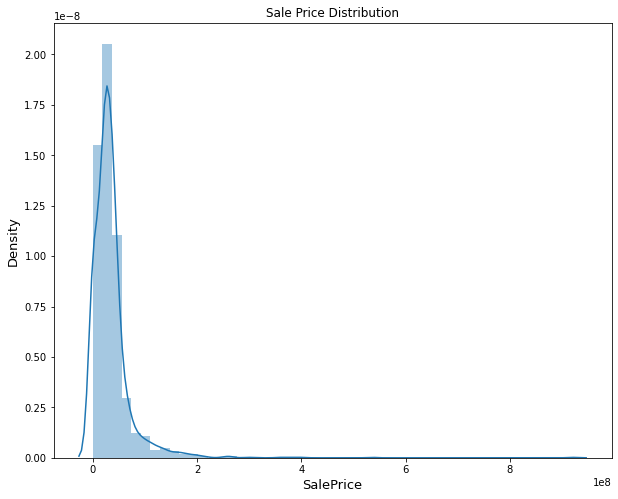

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.title('Sale Price Distribution')
sns.distplot(test_housing_data['house_price'])

plt.ylabel('Density', fontsize=13)
plt.xlabel('SalePrice', fontsize=13)

plt.show()

In [130]:
test_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2170 entries, 0 to 2187
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area           2170 non-null   float64
 1   house_price    2170 non-null   float64
 2   amenities      2170 non-null   object 
 3   floors         2170 non-null   float64
 4   bedrooms       2170 non-null   float64
 5   bathrooms      2170 non-null   float64
 6   property_type  2170 non-null   object 
 7   selling_type   2170 non-null   object 
 8   road_size      2170 non-null   float64
 9   road_type      2170 non-null   object 
 10  location_two   2170 non-null   object 
dtypes: float64(6), object(5)
memory usage: 203.4+ KB


In [131]:
test_housing_data.describe()

,area,house_price,floors,bedrooms,bathrooms,road_size
count,2170.000000,2.170000e+03,2170.000000,2170.000000,2170.000000,2170.000000
mean,7.055171,3.447185e+07,2.652074,4.293779,3.457604,15.263594
std,8.774563,4.132992e+07,0.736431,2.039034,1.428018,26.676859
min,1.000000,5.000000e+01,1.000000,1.000000,1.000000,0.000000
25%,4.000000,1.600000e+07,2.500000,2.500000,2.500000,12.000000
50%,4.312500,2.750000e+07,2.500000,4.000000,3.000000,13.000000
75%,6.000000,4.175269e+07,2.500000,5.000000,4.000000,16.000000
max,106.501096,9.200000e+08,8.500000,15.000000,15.000000,1222.000000


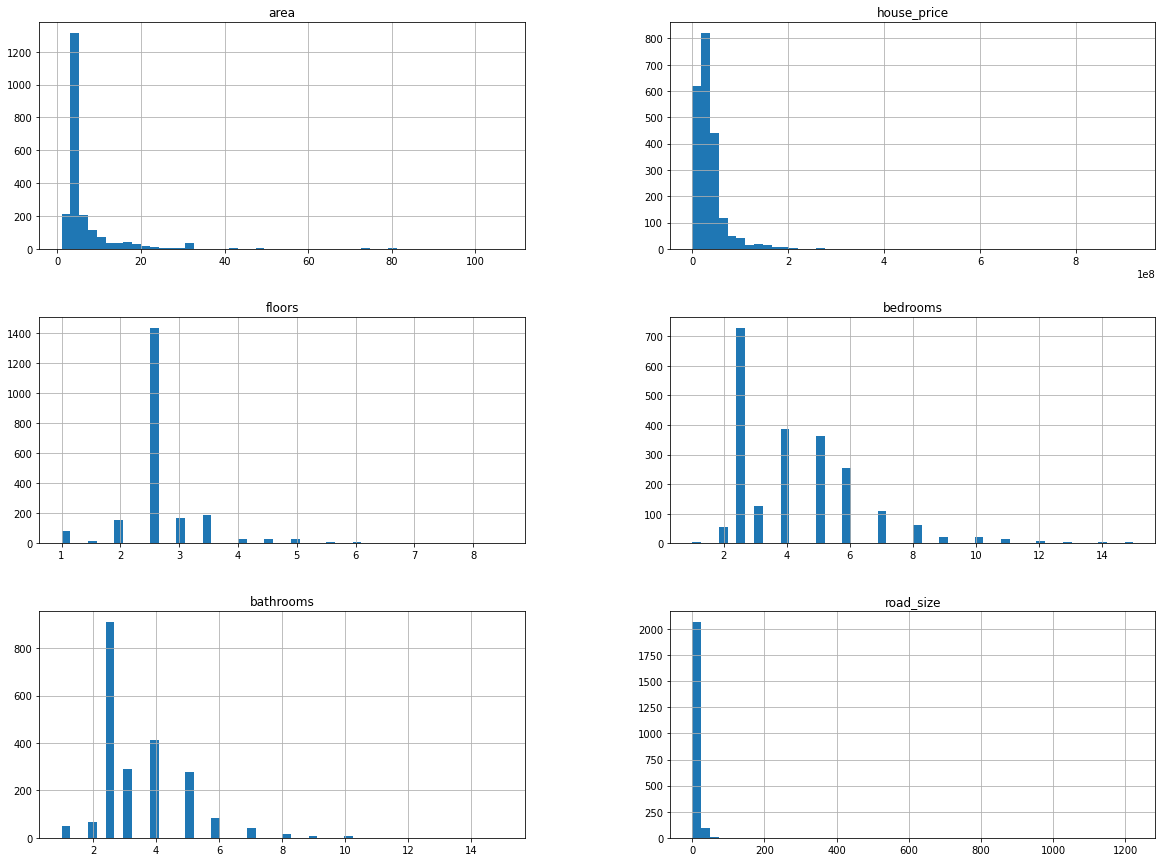

In [132]:
%matplotlib inline
import matplotlib.pyplot as plt
test_housing_data.hist(bins=50, figsize=(20, 15))
plt.show()

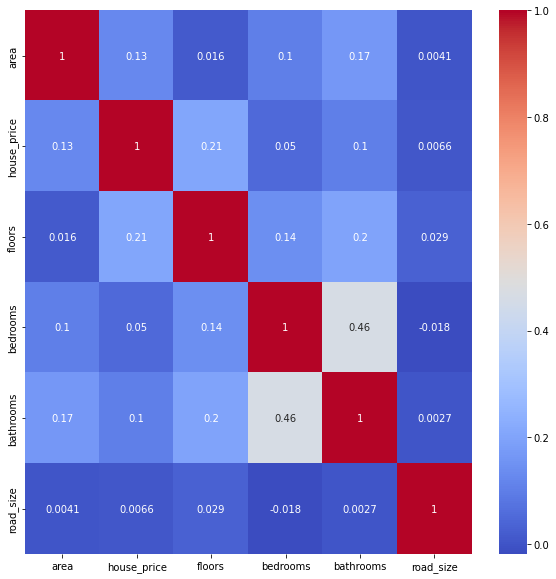

In [133]:
import seaborn as sns

corr_matrix = test_housing_data.corr()
top_corr_features = corr_matrix.index[abs(corr_matrix["house_price"])>0]
plt.figure(figsize=(10,10))

g = sns.heatmap(test_housing_data[top_corr_features].corr(),
                annot=True,
                cmap="coolwarm")

In [134]:
y = test_housing_data["house_price"]

In [135]:
test_housing_data.drop("house_price", axis=1, inplace=True)

In [136]:
x = test_housing_data

## Encoding of Categorical data

In [137]:
dataset=test_housing_data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2170 entries, 0 to 2187
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area           2170 non-null   float64
 1   amenities      2170 non-null   object 
 2   floors         2170 non-null   float64
 3   bedrooms       2170 non-null   float64
 4   bathrooms      2170 non-null   float64
 5   property_type  2170 non-null   object 
 6   selling_type   2170 non-null   object 
 7   road_size      2170 non-null   float64
 8   road_type      2170 non-null   object 
 9   location_two   2170 non-null   object 
dtypes: float64(5), object(5)
memory usage: 186.5+ KB


In [138]:
def amenities_sum(x):
    return len(x)

In [139]:
dataset['amenities'][0]

['Electricity Backup', 'Drainage', 'Parking', 'Drinking Water', 'Bathroom']

In [140]:
dataset['amenities'] = dataset['amenities'].apply(amenities_sum)

In [141]:
dataset.head()

,area,amenities,floors,bedrooms,bathrooms,property_type,selling_type,road_size,road_type,location_two
0,19.0,5,2.5,2.5,2.5,HOUSE,RENT,14.0,Soil Stabilized,Lalitpur Metropolitan City
1,5.0,5,2.5,2.5,2.5,HOUSE,SALE,14.0,Black Topped,Budhanilkantha Municipality
2,4.0,5,3.0,2.5,2.5,HOUSE,SALE,10.0,Gravelled,Budhanilkantha Municipality
3,3.0,4,2.5,2.5,2.5,HOUSE,SALE,8.0,Soil Stabilized,Chandragiri Municipality
4,3.0,6,3.0,4.0,2.5,HOUSE,SALE,10.0,Gravelled,Tokha Municipality


In [142]:
from sklearn.preprocessing import OrdinalEncoder

In [143]:
enc = OrdinalEncoder()
enc.fit(x[["property_type", "selling_type", "road_type", "location_two"]])

OrdinalEncoder()

In [144]:
x[["property_type", "selling_type", "road_type", "location_two"]] = enc.transform(x[["property_type", "selling_type", "road_type", "location_two"]])

In [145]:
x.head()

,area,amenities,floors,bedrooms,bathrooms,property_type,selling_type,road_size,road_type,location_two
0,19.0,5,2.5,2.5,2.5,2.0,0.0,14.0,22.0,17.0
1,5.0,5,2.5,2.5,2.5,2.0,1.0,14.0,19.0,4.0
2,4.0,5,3.0,2.5,2.5,2.0,1.0,10.0,20.0,4.0
3,3.0,4,2.5,2.5,2.5,2.0,1.0,8.0,22.0,6.0
4,3.0,6,3.0,4.0,2.5,2.0,1.0,10.0,20.0,27.0


## Dumping the Data for model building and evaluation


In [148]:
x.describe()

x.to_csv('featuredataset.csv',sep='\t', index=False)

y.to_csv('targetdataset.csv', sep='\t', index=False)

In [149]:
x.describe()

,area,amenities,floors,bedrooms,bathrooms,property_type,selling_type,road_size,road_type,location_two
count,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000
mean,7.055171,5.354378,2.652074,4.293779,3.457604,1.943318,0.828111,15.263594,19.205069,13.817051
std,8.774563,2.432537,0.736431,2.039034,1.428018,0.329877,0.377371,26.676859,2.849194,6.977021
min,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,4.000000,2.500000,2.500000,2.500000,2.000000,1.000000,12.000000,19.000000,6.000000
50%,4.312500,5.000000,2.500000,4.000000,3.000000,2.000000,1.000000,13.000000,19.000000,15.000000
75%,6.000000,6.000000,2.500000,5.000000,4.000000,2.000000,1.000000,16.000000,20.000000,17.000000
max,106.501096,23.000000,8.500000,15.000000,15.000000,2.000000,1.000000,1222.000000,22.000000,28.000000
